In [2]:
import pandas as pd
df = pd.read_csv("car.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
col = ["buying","maint","doors","persons","lug_boot","safety","class"]
df.columns = col
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
for a in col:
    print(df[a].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [6]:
X = df.drop(["class"],axis=1)
y = df["class"]

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [8]:
X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [9]:
import category_encoders as ce

In [10]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [11]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [12]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


In [33]:
y_test

599     unacc
932     unacc
628     unacc
1497      acc
1262    unacc
        ...  
1601    unacc
1033    unacc
341     unacc
147     unacc
360     unacc
Name: class, Length: 570, dtype: object

# Random Forest w default

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
print("model accuracy score with 10 decision trees: {0:0.4f}".
format(accuracy_score(y_test,y_pred)))

model accuracy score with 10 decision trees: 0.9649


default da 100 decision tree var.

# Random forest w paramater n_estimators=100

In [16]:
rfc_100 = RandomForestClassifier(n_estimators=1000,random_state=0,)
rfc_100.fit(X_train,y_train)
y_pred_100 = rfc_100.predict(X_test)

In [17]:
print("model accuracy score with 1000 decision trees:{0:0.4f}".
      format(accuracy_score(y_test,y_pred_100)))

model accuracy score with 1000 decision trees:0.9702


# Finding Important Features

In [18]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [19]:
feature_scores = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [20]:
feature_scores

safety      0.291657
persons     0.235380
buying      0.160692
maint       0.134143
lug_boot    0.111595
doors       0.066533
dtype: float64

<AxesSubplot:>

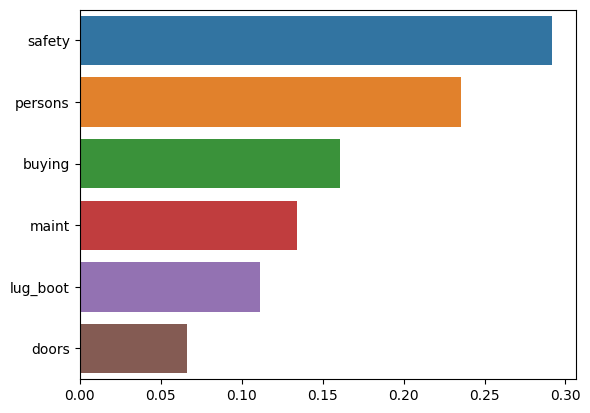

In [21]:
import seaborn as sns
sns.barplot(x=feature_scores,y=feature_scores.index)

görüldüğü gibi doors un etkisi çok az.şimdi özellik seçerek aynı modellemeyi yapalım.

In [22]:
X_important = df.drop(["class","doors"],axis=1)
y_important = df["class"]

In [23]:
Xi_train ,Xi_test ,yi_train ,yi_test = train_test_split(X_important,y_important,test_size=0.3,random_state=42)

In [24]:
encoder2 = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])
Xi_train = encoder2.fit_transform(Xi_train)
Xi_test = encoder2.transform(Xi_test)

In [25]:
rfci = RandomForestClassifier(n_estimators=100,random_state=0)
rfci.fit(Xi_train,yi_train)
yi_pred = rfci.predict(Xi_test)

In [26]:
print("model accuracy score without door with 100 trees:{0:0.4f}".
      format(accuracy_score(yi_test,yi_pred)))

model accuracy score without door with 100 trees:0.9287


In [27]:
print(accuracy_score(yi_test,yi_pred))

0.928709055876686
